## Please follow the below structure while attempting the hackathon, make sure to submit the jupyter file as well for every submission you are making.

## Please answer the descriptive question in the Jupyter Notebook Itself. This is going to carry more weightage in the final evaluation.

## Importing Necessary Libraries

In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_rows = None
pd.options.display.max_columns = None
from warnings import filterwarnings
filterwarnings("ignore")
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 4
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


## 1 Data Cleaning

In this section you can do all the Data cleaning part of all necessary imputations and treatments























Loading the dataset

In [2]:
df = pd.read_csv("Train_Set_TVS.csv")
xtest = pd.read_csv("Test_Set_TVS.csv")
df.head()

ID  Compensation Vehicle_Status  Loan_amt  Annuity_amt  density_Ind  \
0  540071      801850.0              Y  658040.0     13816.52       0.0304   
1  511643      884222.0              N  198075.0     11173.06       0.0194   
2  506688      284120.0              N  101056.0      8390.40       0.0118   
3  499360      341874.0              N  179008.0      7184.13       0.0373   
4  438350     1259895.0              Y  573715.0     13212.77       0.0138   

  Job_Type Default_hist     Prop_List  Home_Appliances Region_Type Credit_Inq  \
0       IT          ndf  Morethan_One              NaN       Metro          1   
1       IT          ndf  Morethan_One              1.0       Metro          2   
2    Govt.          ndf           One              4.0       Metro          3   
3   Non-IT           df          None              2.0       Metro          1   
4   Non-IT          ndf  Morethan_One              1.0       Rural          2   

  Education_det Marital_Stat Gen Credit_Lnks  Experience     Income_Alt  \
0          Grad      Married   F      1_to_3         0.9  Not_Specified   
1          Grad      Married   M      1_to_3         3.0  Not_Specified   
2         Other      Married   M      1_to_3         NaN  Not_Specified   
3          Grad      Married   M      1_to_3         4.7  Not_Specified   
4          Grad      Married   F      4_to_6         6.9              Y   

  Day_Process Ph.No Type_Loan  Dependents  Company_Rating Region   Age  \
0         SAT   Yes     CLoan         3.0             2.0   East  46.0   
1         wed   Yes     CLoan         3.0             1.0  North  46.0   
2         mon   Yes     CLoan         2.0             3.0  North  57.0   
3         wed   Yes     RLoan         4.0             2.0  South  39.0   
4         Sun   Yes     CLoan         3.0             1.0  North  32.0   

   hour_Process Addr_permanent Permanent_Addr_tag  c1_rated  c2_rated  \
0          10.0            Yes                 No     0.077     0.077   
1          12.0            Yes                Yes     0.184     0.184   
2           5.0            Yes                Yes     0.538     0.538   
3          12.0            Yes                Yes       NaN     0.561   
4          16.0            Yes                Yes       NaN     0.200   

   Contact_age  Product_bought  Default  
0         18.0             2.0      1.0  
1        306.0             4.0      0.0  
2        281.0             4.0      0.0  
3         20.0             4.0      0.0  
4       2339.0             6.0      0.0

In [4]:
xtest.set_index(["ID"],inplace = True)

Checking the shape of the data

In [6]:
df.shape

(132440, 33)

Checking the datatype

In [7]:
df.dtypes

ID                      int64
Compensation          float64
Vehicle_Status         object
Loan_amt              float64
Annuity_amt           float64
density_Ind           float64
Job_Type               object
Default_hist           object
Prop_List              object
Home_Appliances       float64
Region_Type            object
Credit_Inq             object
Education_det          object
Marital_Stat           object
Gen                    object
Credit_Lnks            object
Experience            float64
Income_Alt             object
Day_Process            object
Ph.No                  object
Type_Loan              object
Dependents            float64
Company_Rating        float64
Region                 object
Age                   float64
hour_Process          float64
Addr_permanent         object
Permanent_Addr_tag     object
c1_rated              float64
c2_rated              float64
Contact_age           float64
Product_bought        float64
Default               float64
dtype: obj

In [8]:
# we can see that the home appliances,ID,Dependents and Company_Rating is a discrete value howver it is given here as float hence changing it to categorical

# This is the old one making it as markdown

In [ ]:
df["Home_Appliances"] = df["Home_Appliances"].astype(object)
df["Company_Rating"] =df["Company_Rating"].astype(object)
df["ID"] =df["ID"].astype(object)
df["Dependents"] =df["Dependents"].astype(object)
df["Default"] =df["Default"].astype(object)
xtest["Home_Appliances"] = xtest["Home_Appliances"].astype(object)
xtest["Company_Rating"] =xtest["Company_Rating"].astype(object)
xtest["ID"] =df["ID"].astype(object)
xtest["Dependents"] =xtest["Dependents"].astype(object)

In [10]:
df.dtypes

ID                     object
Compensation          float64
Vehicle_Status         object
Loan_amt              float64
Annuity_amt           float64
density_Ind           float64
Job_Type               object
Default_hist           object
Prop_List              object
Home_Appliances       float64
Region_Type            object
Credit_Inq             object
Education_det          object
Marital_Stat           object
Gen                    object
Credit_Lnks            object
Experience            float64
Income_Alt             object
Day_Process            object
Ph.No                  object
Type_Loan              object
Dependents            float64
Company_Rating        float64
Region                 object
Age                   float64
hour_Process          float64
Addr_permanent         object
Permanent_Addr_tag     object
c1_rated              float64
c2_rated              float64
Contact_age           float64
Product_bought        float64
Default                object
dtype: obj

Five point summary

In [11]:
df.describe()

Compensation      Loan_amt    Annuity_amt    density_Ind  \
count  1.261980e+05  1.324400e+05  127829.000000  127024.000000   
mean   7.450519e+05  4.148011e+05   10845.286442       0.020446   
std    4.702762e+05  2.746788e+05    2061.529355       0.015077   
min    1.527280e+05  3.427500e+04    5852.100000       0.000100   
25%    5.177060e+05  2.045300e+05    9348.370000       0.010400   
50%    6.659960e+05  3.495425e+05   10773.820000       0.020400   
75%    8.794890e+05  5.582050e+05   12165.390000       0.030400   
max    7.037702e+07  2.872142e+06   41301.000000       2.017800   

       Home_Appliances     Experience     Dependents  Company_Rating  \
count    121476.000000  110595.000000  132440.000000   120709.000000   
mean          3.220891       6.580616       2.155467        2.030553   
std           1.241751       6.357054       0.909046        0.503750   
min           1.000000       0.000000       1.000000        1.000000   
25%           2.000000       2.100000       2.000000        2.000000   
50%           4.000000       4.600000       2.000000        2.000000   
75%           4.000000       9.000000       3.000000        2.000000   
max          19.000000      48.100000       9.000000        3.000000   

                Age   hour_Process       c1_rated       c2_rated  \
count  132440.00000  132440.000000  114927.000000  119119.000000   
mean       43.93326      12.060865       0.505929       0.506181   
std        11.96270       3.566714       0.268665       0.268716   
min        21.00000       0.000000       0.000000       0.000000   
25%        34.00000      10.000000       0.268000       0.268000   
50%        43.00000      12.000000       0.500000       0.500000   
75%        54.00000      15.000000       0.769000       0.769000   
max        69.00000      25.000000       0.947000       0.947000   

         Contact_age  Product_bought  
count  124287.000000   132440.000000  
mean      979.451383        3.387738  
std       829.632194        2.173246  
min        10.000000        0.000000  
25%       288.000000        2.000000  
50%       770.000000        3.000000  
75%      1589.000000        5.000000  
max      4309.000000       25.000000

Checking for null values

In [12]:
df.isnull().sum()

ID                        0
Compensation           6242
Vehicle_Status         9104
Loan_amt                  0
Annuity_amt            4611
density_Ind            5416
Job_Type              10248
Default_hist              0
Prop_List              1965
Home_Appliances       10964
Region_Type               0
Credit_Inq             2690
Education_det             0
Marital_Stat              0
Gen                       0
Credit_Lnks               0
Experience            21845
Income_Alt             7682
Day_Process               0
Ph.No                     0
Type_Loan                 0
Dependents                0
Company_Rating        11731
Region                    0
Age                       0
hour_Process              0
Addr_permanent            0
Permanent_Addr_tag        0
c1_rated              17513
c2_rated              13321
Contact_age            8153
Product_bought            0
Default                   0
dtype: int64

In [13]:
a = ((df.isnull().sum())/len(df))*100 
a[a>0]

Compensation        4.713078
Vehicle_Status      6.874056
Annuity_amt         3.481577
density_Ind         4.089399
Job_Type            7.737844
Prop_List           1.483691
Home_Appliances     8.278466
Credit_Inq          2.031108
Experience         16.494262
Income_Alt          5.800362
Company_Rating      8.857596
c1_rated           13.223346
c2_rated           10.058140
Contact_age         6.155995
dtype: float64

<AxesSubplot:xlabel='Compensation', ylabel='Density'>

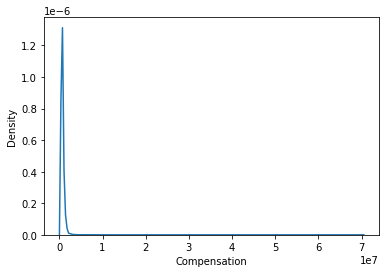

In [14]:
sns.kdeplot(df["Compensation"])

In [15]:
#Since it is right skewed we are filling it with the median
df["Compensation"].fillna(df["Compensation"].median(),inplace = True)
xtest["Compensation"].fillna(xtest["Compensation"].median(),inplace = True)

In [16]:
# we are filling the vehicle status with mode
df["Vehicle_Status"].fillna(df["Vehicle_Status"].mode()[0],inplace = True)
xtest["Vehicle_Status"].fillna(xtest["Vehicle_Status"].mode()[0],inplace = True)

In [17]:
a[a>0]

Compensation        4.713078
Vehicle_Status      6.874056
Annuity_amt         3.481577
density_Ind         4.089399
Job_Type            7.737844
Prop_List           1.483691
Home_Appliances     8.278466
Credit_Inq          2.031108
Experience         16.494262
Income_Alt          5.800362
Company_Rating      8.857596
c1_rated           13.223346
c2_rated           10.058140
Contact_age         6.155995
dtype: float64

<AxesSubplot:xlabel='Annuity_amt', ylabel='Density'>

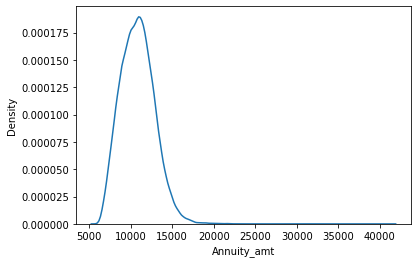

In [18]:
sns.kdeplot(df["Annuity_amt"])

In [19]:
#Since it is right skewed we are filling it with the median
df["Annuity_amt"].fillna(df["Annuity_amt"].median(),inplace = True)
xtest["Annuity_amt"].fillna(xtest["Annuity_amt"].median(),inplace = True)

<AxesSubplot:xlabel='density_Ind', ylabel='Density'>

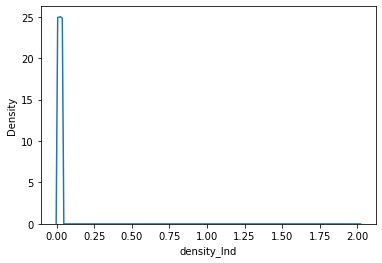

In [20]:
sns.kdeplot(df["density_Ind"])

In [21]:
#Since it is right skewed we are filling it with the median
df["density_Ind"].fillna(df["density_Ind"].median(),inplace = True)
xtest["density_Ind"].fillna(xtest["density_Ind"].median(),inplace = True)

In [22]:
# we are filling the Jpb type with mode
df["Job_Type"].fillna(df["Job_Type"].mode()[0],inplace = True)
xtest["Job_Type"].fillna(xtest["Job_Type"].mode()[0],inplace = True)

In [23]:
# we are filling the Prop list with mode
df["Prop_List"].fillna(df["Prop_List"].mode()[0],inplace = True)
xtest["Prop_List"].fillna(xtest["Prop_List"].mode()[0],inplace = True)

In [24]:
# we are filling the Home_Appliances with mode
df["Home_Appliances"].fillna(df["Home_Appliances"].mode()[0],inplace = True)
xtest["Home_Appliances"].fillna(xtest["Home_Appliances"].mode()[0],inplace = True)

In [25]:
# we are filling the Credit_Inq with mode
df["Credit_Inq"].fillna(df["Credit_Inq"].mode()[0],inplace = True)
xtest["Credit_Inq"].fillna(xtest["Credit_Inq"].mode()[0],inplace = True)

<AxesSubplot:xlabel='Experience', ylabel='Density'>

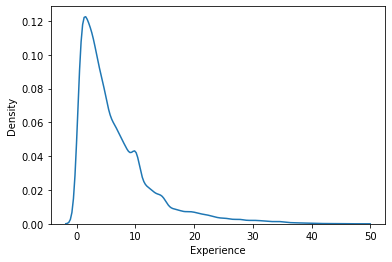

In [26]:
sns.kdeplot(df["Experience"])

In [27]:
#Since it is right skewed we are filling it with the median
df["Experience"].fillna(df["Experience"].median(),inplace = True)
xtest["Experience"].fillna(xtest["Experience"].median(),inplace = True)

In [28]:
# we are filling the Income_Alt with mode
df["Income_Alt"].fillna(df["Income_Alt"].mode()[0],inplace = True)
xtest["Income_Alt"].fillna(xtest["Income_Alt"].mode()[0],inplace = True)

In [29]:
# we are filling the Company_Rating with mode
df["Company_Rating"].fillna(df["Company_Rating"].mode()[0],inplace = True)
xtest["Company_Rating"].fillna(xtest["Company_Rating"].mode()[0],inplace = True)

<AxesSubplot:xlabel='c1_rated', ylabel='Density'>

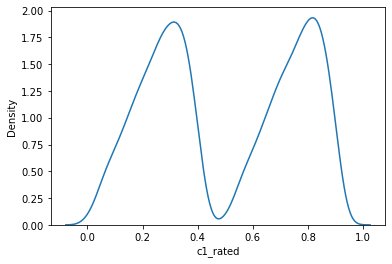

In [30]:
sns.kdeplot(df["c1_rated"])

In [31]:
#Since it is normally distributed we are filling it with the mean
df["c1_rated"].fillna(df["c1_rated"].mean(),inplace = True)
xtest["c1_rated"].fillna(xtest["c1_rated"].mean(),inplace = True)

<AxesSubplot:xlabel='c2_rated', ylabel='Density'>

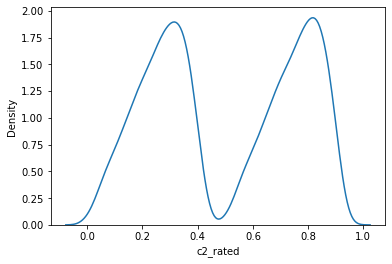

In [32]:
sns.kdeplot(df["c2_rated"])

In [33]:
#we find that c1_rated and c2_rated are almost the same hence dropping c2
df.drop(["c2_rated"],axis =1,inplace = True)
xtest.drop(["c2_rated"],axis =1,inplace = True)

<AxesSubplot:xlabel='Contact_age', ylabel='Density'>

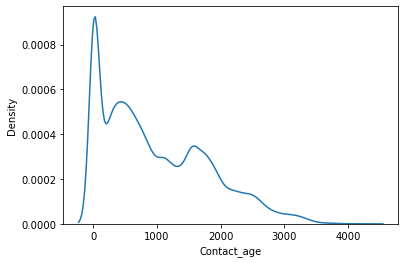

In [34]:
sns.kdeplot(df["Contact_age"])

In [35]:
#Since it is right skewed we are filling it with the median
df["Contact_age"].fillna(df["Contact_age"].median(),inplace = True)
xtest["Contact_age"].fillna(xtest["Contact_age"].median(),inplace = True)

Checking for non standard null values

In [36]:
df_num = df.select_dtypes(np.number)
xtest_num = xtest.select_dtypes(np.number)
df_cat = df.select_dtypes(object)
xtest_cat = xtest.select_dtypes(object)

In [37]:
for i in df_cat.columns:
    print(df[i].value_counts())

540071    1
502732    1
388684    1
471090    1
440958    1
559883    1
443322    1
532621    1
462323    1
514666    1
540460    1
575064    1
494409    1
408003    1
401074    1
564164    1
567388    1
464007    1
502149    1
488381    1
499890    1
563230    1
490246    1
434344    1
428279    1
555694    1
467854    1
489327    1
464890    1
485623    1
460054    1
483785    1
466938    1
534423    1
557637    1
505124    1
429609    1
552120    1
509184    1
396456    1
510135    1
519959    1
539891    1
486465    1
506176    1
566498    1
502930    1
465031    1
396551    1
459818    1
463054    1
437720    1
513222    1
560887    1
435711    1
561566    1
580234    1
429796    1
576516    1
393299    1
520061    1
394393    1
540082    1
461093    1
479783    1
466436    1
416814    1
570975    1
568005    1
446006    1
517650    1
582559    1
561977    1
451811    1
498007    1
534232    1
537209    1
555291    1
440520    1
567622    1
571770    1
390098    1
389652    1
3939

In [38]:
for i in df_num.columns:
    print(df[i].value_counts())

665996.0      6242
452880.0        10
668304.0        10
669256.0        10
719880.0         9
513162.0         9
536792.0         9
520923.0         9
562030.0         8
647080.0         8
528360.0         8
698040.0         8
676800.0         8
582624.0         8
831402.0         8
537320.0         8
483480.0         8
582084.0         8
531930.0         8
644436.0         8
596258.0         8
623700.0         8
475720.0         8
607240.0         8
530784.0         8
607320.0         8
742368.0         8
730800.0         8
529618.0         8
437076.0         8
889480.0         8
469800.0         7
737965.0         7
681720.0         7
597800.0         7
557294.0         7
722960.0         7
593215.0         7
970632.0         7
529176.0         7
532467.0         7
541692.0         7
676970.0         7
625443.0         7
704900.0         7
644560.0         7
959400.0         7
546840.0         7
465920.0         7
541892.0         7
575144.0         7
612535.0         7
541800.0    

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



10773.82    4612
11522.15       5
11612.50       5
10632.02       4
12530.75       4
11561.83       4
11689.15       4
11933.62       4
8807.61        4
10543.68       4
11094.04       4
10242.58       4
10920.87       4
10611.10       4
12178.97       4
11535.48       4
9375.14        4
11624.36       4
7716.91        4
12174.41       4
11136.07       4
10240.89       4
11326.43       4
11359.38       4
10238.39       4
12229.71       4
8931.30        4
10855.83       4
11018.73       4
11529.16       4
11105.35       4
11175.42       4
12458.15       4
10199.06       4
10358.11       4
10740.24       4
9940.52        4
9685.63        4
13804.81       4
9618.38        4
12695.53       4
10470.74       4
8958.44        4
11127.74       4
10941.02       3
11363.17       3
12477.06       3
10416.25       3
10146.60       3
8015.86        3
11083.80       3
12041.07       3
9849.37        3
10673.31       3
10984.08       3
12684.57       3
11825.26       3
11955.33       3
8376.61       

As there is no non standard null value we are going a head

## 2 Exploratory Data Analyis

In this section you can talk about the plots and the insights you have generated from the data

























Univariate analysis

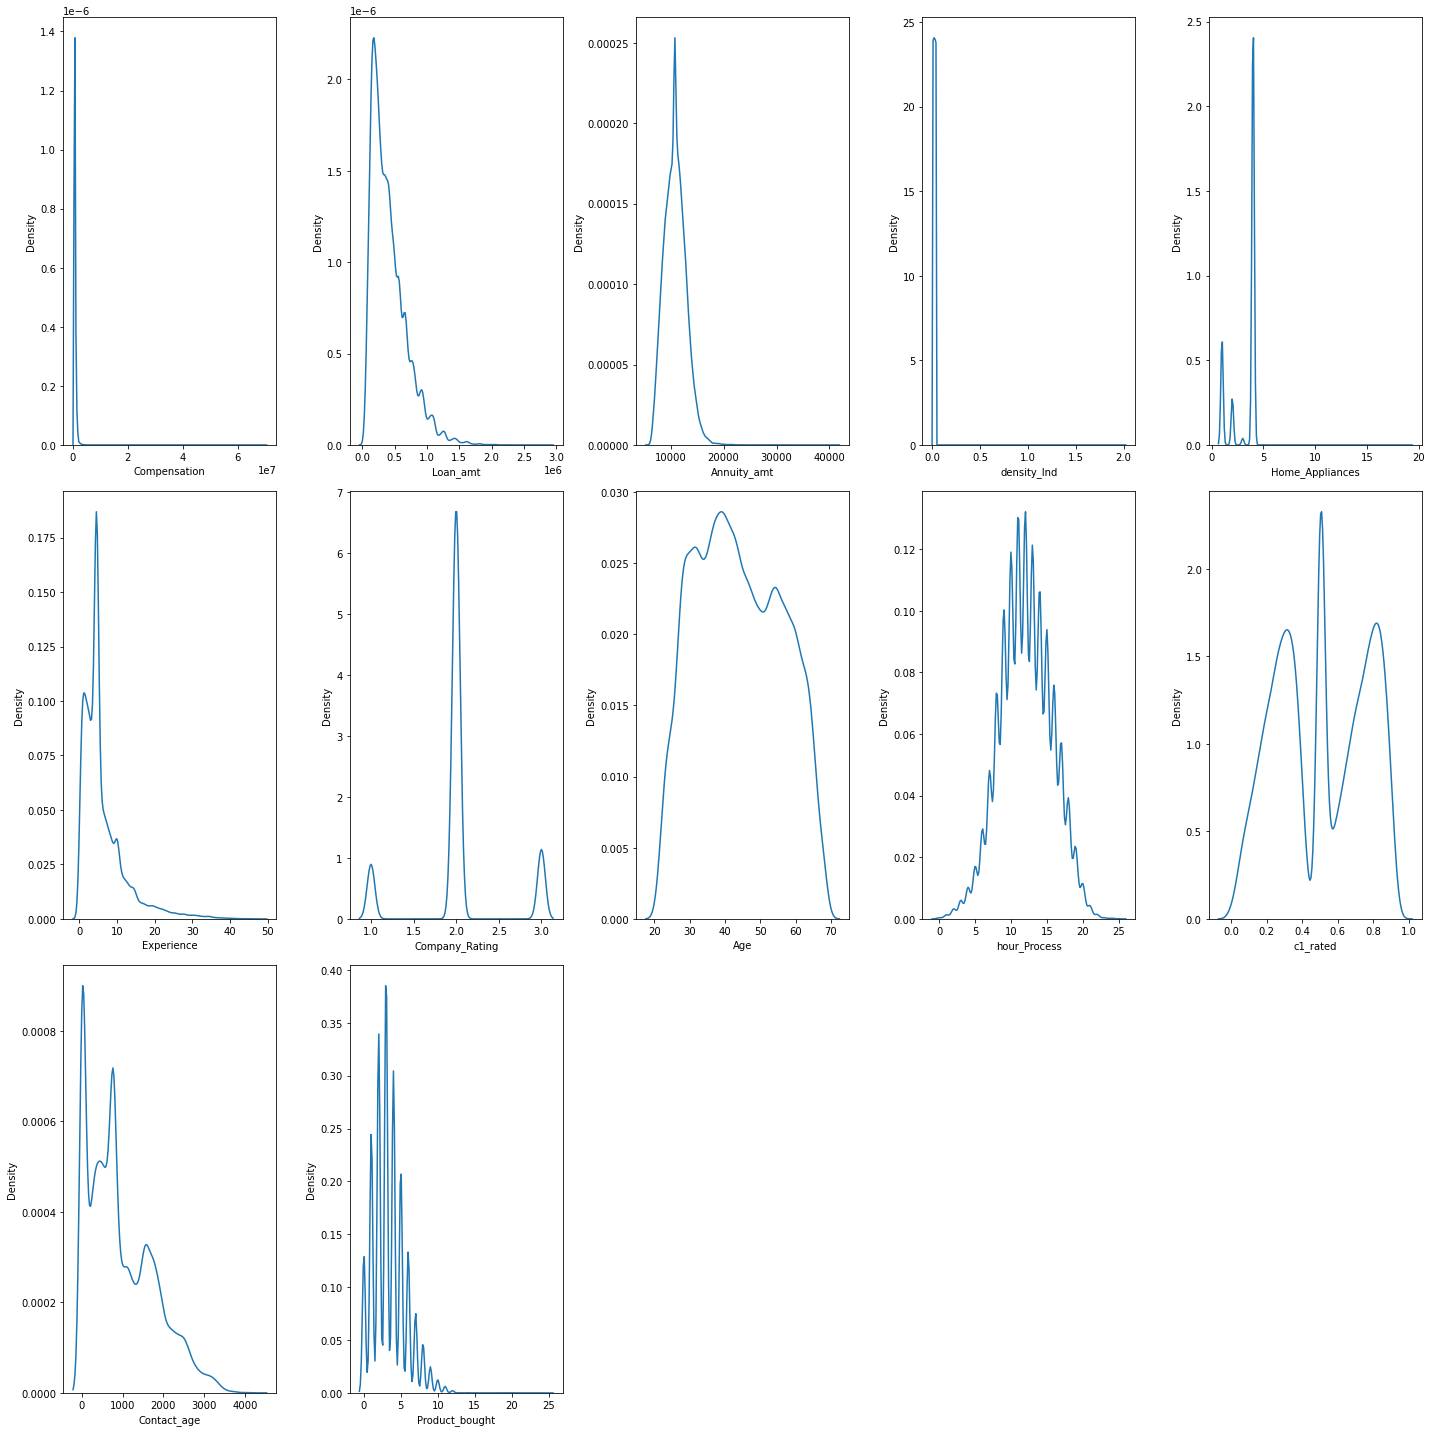

In [227]:
j = 1
plt.figure(figsize=(20,20))
for i in df_num.columns:
    plt.subplot(3,5,j)
    sns.kdeplot(df[i])
    j = j+1
plt.tight_layout()

Univariate analysis for categorical columns

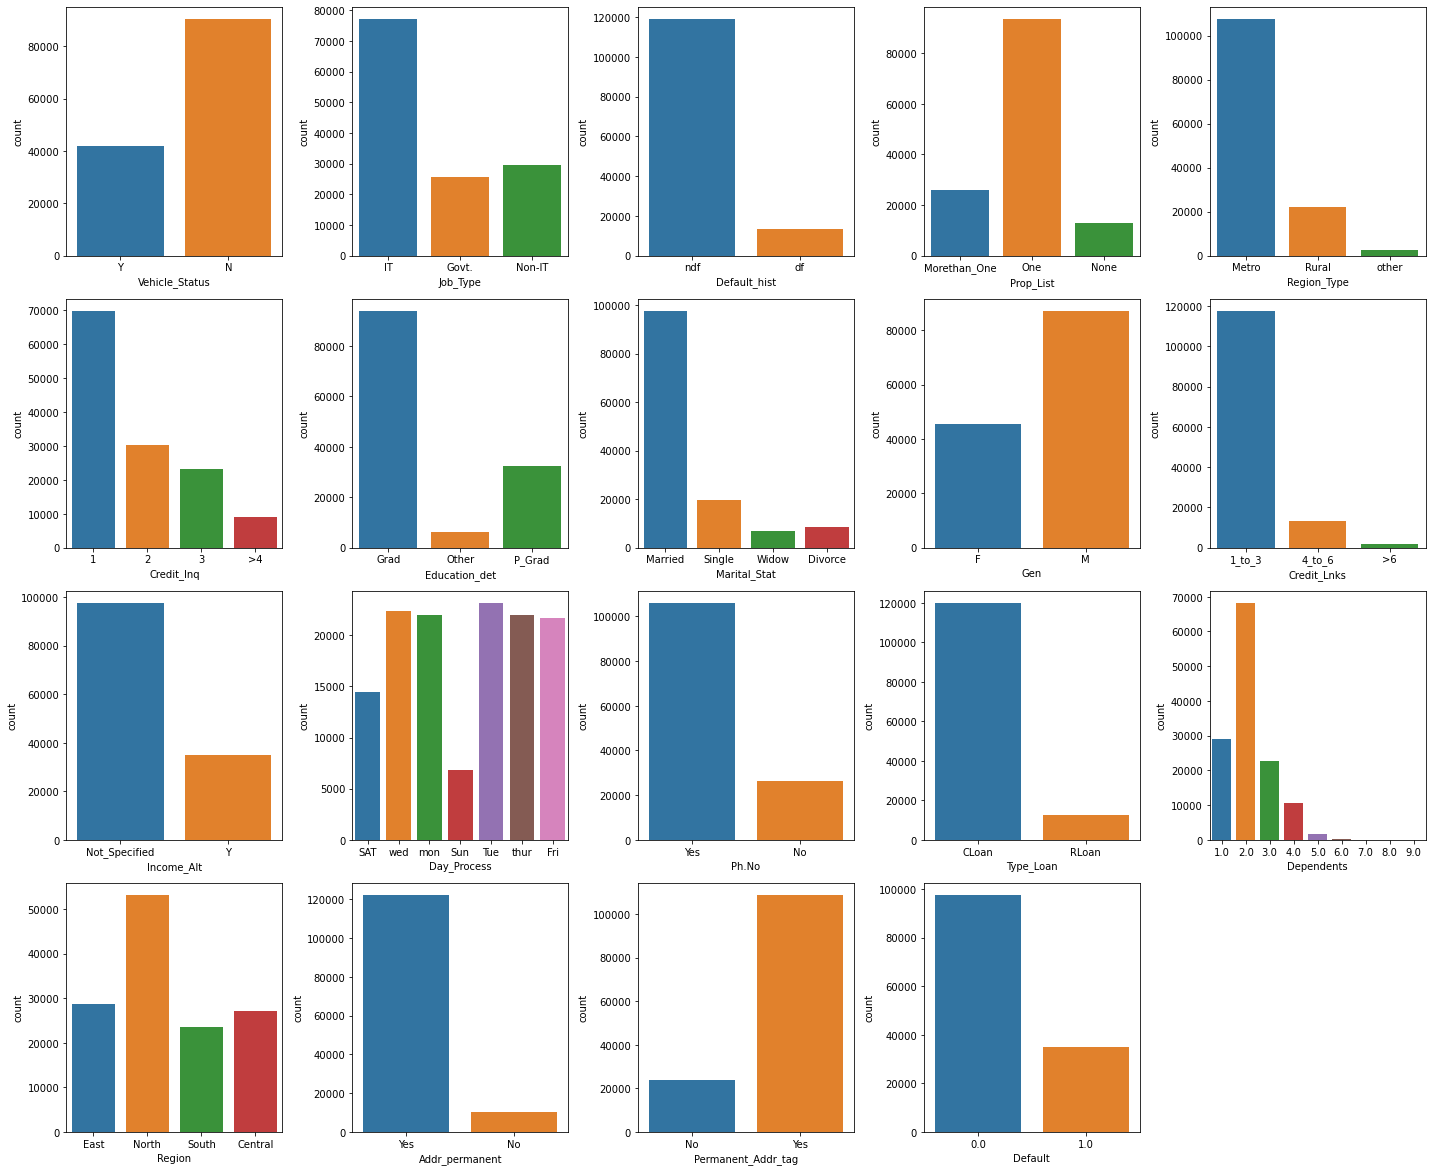

In [228]:
j = 1
plt.figure(figsize=(20,20))
for i in df_cat.iloc[:,1:].columns:
    plt.subplot(5,5,j)
    sns.countplot(df[i])
    j = j+1
plt.tight_layout()

Multivaraite analysis

<AxesSubplot:>

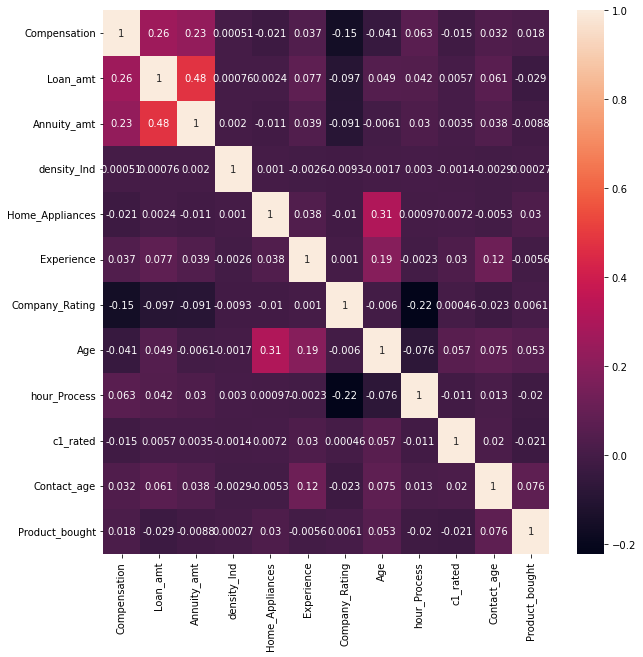

In [229]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True)

In [39]:
from sklearn.preprocessing import PowerTransformer

In [40]:
pt = PowerTransformer()
df_tra = pt.fit_transform(df_num)
df_tra = pd.DataFrame(df_tra,columns = df_num.columns)

In [41]:
df_tra.skew()

Compensation      -0.021761
Loan_amt          -0.012618
Annuity_amt        0.001247
density_Ind       -0.037286
Home_Appliances    2.120848
Experience         0.002800
Dependents         0.006796
Company_Rating     0.069004
Age               -0.053664
hour_Process      -0.016229
c1_rated          -0.059129
Contact_age       -0.267519
Product_bought    -0.021951
dtype: float64

## 3 Model Building

In this you can build various ML models and try tuning the parameters involved to achieve better score

In [42]:
df_cat.drop(["ID"],axis = 1,inplace = True)


In [43]:
df_encoded = pd.get_dummies(df_cat,drop_first=True)
xtest_encoded = pd.get_dummies(xtest,drop_first=True)
xtest_encoded.head()

Compensation   Loan_amt  Annuity_amt  density_Ind  Home_Appliances  \
ID                                                                           
487410      653106.0  809400.00      9145.51       0.0015              1.0   
533258      434150.0   72618.75      7683.23       0.0332              4.0   
581926      489060.0  267255.80      9032.85       0.0316              4.0   
486301      957294.0  623600.00     12838.25       0.0320              4.0   
580822     1333739.0  529520.00     11799.09       0.0073              4.0   

        Experience  Dependents  Company_Rating   Age  hour_Process  c1_rated  \
ID                                                                             
487410         5.4         3.0             2.0  39.0          11.0     0.349   
533258         2.3         2.0             3.0  46.0          13.0     0.237   
581926        11.0         3.0             2.0  33.0          15.0     0.111   
486301         9.7         2.0             2.0  48.0          12.0     0.323   
580822         4.6         2.0             3.0  53.0           7.0     0.940   

        Contact_age  Product_bought  Vehicle_Status_Y  Job_Type_IT  \
ID                                                                   
487410       3133.0             2.0                 1            0   
533258       1730.0             5.0                 0            0   
581926        759.0             4.0                 0            1   
486301        609.0             4.0                 0            1   
580822       1222.0             1.0                 0            0   

        Job_Type_Non-IT  Default_hist_ndf  Prop_List_None  Prop_List_One  \
ID                                                                         
487410                0                 1               0              0   
533258                0                 1               0              1   
581926                0                 1               0              0   
486301                0                 1               0              1   
580822                1                 1               0              1   

        Region_Type_Rural  Region_Type_other  Credit_Inq_2  Credit_Inq_3  \
ID                                                                         
487410                  0                  0             0             0   
533258                  0                  0             0             0   
581926                  1                  0             0             0   
486301                  0                  0             0             0   
580822                  0                  0             0             1   

        Credit_Inq_>4  Education_det_Other  Education_det_P_Grad  \
ID                                                                 
487410              0                    0                     0   
533258              0                    0                     0   
581926              0                    0                     0   
486301              0                    0                     0   
580822              0                    0                     1   

        Marital_Stat_Married  Marital_Stat_Single  Marital_Stat_Widow  Gen_M  \
ID                                                                             
487410                     1                    0                   0      1   
533258                     1                    0                   0      1   
581926                     1                    0                   0      1   
486301                     1                    0                   0      1   
580822                     1                    0                   0      0   

        Credit_Lnks_4_to_6  Credit_Lnks_>6  Income_Alt_Y  Day_Process_SAT  \
ID                                                                          
487410                   0               0             0                0   
533258                   0               0             1                0 

In [44]:
df_full = pd.concat([df_tra,df_encoded],axis =1)
df_full.head()

Compensation  Loan_amt  Annuity_amt  density_Ind  Home_Appliances  \
0      0.462145  1.009943     1.408162     0.888069         0.580147   
1      0.695490 -0.801363     0.244884    -0.048501        -1.750963   
2     -2.418266 -1.717829    -1.282594    -0.739552         0.580147   
3     -1.845708 -0.943523    -2.090911     1.439674        -1.264533   
4      1.492232  0.790893     1.161193    -0.554055        -1.750963   

   Experience  Dependents  Company_Rating       Age  hour_Process  c1_rated  \
0   -1.548728    0.991634       -0.057155  0.228539     -0.578563 -1.745125   
1   -0.463483    0.991634       -2.139674  0.228539     -0.017970 -1.295576   
2    0.014096   -0.015691        2.018931  1.080244     -1.976878  0.142938   
3    0.038999    1.739385       -0.057155 -0.359573     -0.017970  0.015323   
4    0.494363    0.991634       -2.139674 -0.994709      1.104783  0.015323   

   Contact_age  Product_bought  Vehicle_Status_Y  Job_Type_IT  \
0    -1.671860       -0.553063                 1            1   
1    -0.647768        0.409713                 0            1   
2    -0.700206        0.409713                 0            0   
3    -1.652236        0.409713                 0            0   
4     1.382892        1.172224                 1            0   

   Job_Type_Non-IT  Default_hist_ndf  Prop_List_None  Prop_List_One  \
0                0                 1               0              0   
1                0                 1               0              0   
2                0                 1               0              1   
3                1                 0               1              0   
4                1                 1               0              0   

   Region_Type_Rural  Region_Type_other  Credit_Inq_2  Credit_Inq_3  \
0                  0                  0             0             0   
1                  0                  0             1             0   
2                  0                  0             0             1   
3                  0                  0             0             0   
4                  1                  0             1             0   

   Credit_Inq_>4  Education_det_Other  Education_det_P_Grad  \
0              0                    0                     0   
1              0                    0                     0   
2              0                    1                     0   
3              0                    0                     0   
4              0                    0                     0   

   Marital_Stat_Married  Marital_Stat_Single  Marital_Stat_Widow  Gen_M  \
0                     1                    0                   0      0   
1                     1                    0                   0      1   
2                     1                    0                   0      1   
3                     1                    0                   0      1   
4                     1                    0                   0      0   

   Credit_Lnks_4_to_6  Credit_Lnks_>6  Income_Alt_Y  Day_Process_SAT  \
0                   0               0             0                1   
1                   0               0             0                0   
2                   0               0             0                0   
3                   0               0             0                0   
4                   1               0             1                0   

   Day_Process_Sun  Day_Process_Tue  Day_Process_mon  Day_Process_thur  \
0                0                0                0                 0   
1                0                0                0                 0   
2                0                0                1                 0   
3                0                0                0                 0   
4                1                0                0                 0   

   Day_Process_wed  Ph.No_Yes  Type_Loan_RLoan  Region_East  Region_North  \
0                0          1                0            1      

In [45]:
xtest_encoded.iloc[:,:12].head()
pt = PowerTransformer()
xtest_encoded.iloc[:,:12] = pt.fit_transform(xtest_encoded.iloc[:,:12])
xtest_encoded.head()

Compensation  Loan_amt  Annuity_amt  density_Ind  Home_Appliances  \
ID                                                                          
487410     -0.045086  1.344953    -0.822106    -1.743612        -1.760069   
533258     -1.148371 -2.143100    -1.745649     1.113289         0.579535   
581926     -0.814481 -0.366354    -0.888213     0.985566         0.579535   
486301      0.887583  0.924379     1.010922     1.017647         0.579535   
580822      1.625100  0.666366     0.550360    -1.165686         0.579535   

        Experience  Dependents  Company_Rating       Age  hour_Process  \
ID                                                                       
487410    0.192722    0.996300       -0.053680 -0.359434     -0.302851   
533258   -0.755533   -0.008834        2.019943  0.227952      0.259757   
581926    1.067496    0.996300       -0.053680 -0.900121      0.821898   
486301    0.909725   -0.008834       -0.053680  0.388551     -0.021484   
580822    0.003771   -0.008834        2.019943  0.777871     -1.429820   

        c1_rated  Contact_age  Product_bought  Vehicle_Status_Y  Job_Type_IT  \
ID                                                                             
487410 -0.612287     1.854638             2.0                 1            0   
533258 -1.073280     0.968758             5.0                 0            0   
581926 -1.602778     0.057521             4.0                 0            1   
486301 -0.718546    -0.136556             4.0                 0            1   
580822  1.701008     0.545041             1.0                 0            0   

        Job_Type_Non-IT  Default_hist_ndf  Prop_List_None  Prop_List_One  \
ID                                                                         
487410                0                 1               0              0   
533258                0                 1               0              1   
581926                0                 1               0              0   
486301                0                 1               0              1   
580822                1                 1               0              1   

        Region_Type_Rural  Region_Type_other  Credit_Inq_2  Credit_Inq_3  \
ID                                                                         
487410                  0                  0             0             0   
533258                  0                  0             0             0   
581926                  1                  0             0             0   
486301                  0                  0             0             0   
580822                  0                  0             0             1   

        Credit_Inq_>4  Education_det_Other  Education_det_P_Grad  \
ID                                                                 
487410              0                    0                     0   
533258              0                    0                     0   
581926              0                    0                     0   
486301              0                    0                     0   
580822              0                    0                     1   

        Marital_Stat_Married  Marital_Stat_Single  Marital_Stat_Widow  Gen_M  \
ID                                                                             
487410                     1                    0                   0      1   
533258                     1                    0                   0      1   
581926                     1                    0                   0      1   
486301                     1                    0                   0      1   
580822                     1                    0                   0      0   

        Credit_Lnks_4_to_6  Credit_Lnks_>6  Income_Alt_Y  Day_Process_SAT  \
ID                                                                          
487410                   0               0             0                0   
533258                   0               0           

In [46]:
df_full.columns

Index(['Compensation', 'Loan_amt', 'Annuity_amt', 'density_Ind',
       'Home_Appliances', 'Experience', 'Dependents', 'Company_Rating', 'Age',
       'hour_Process', 'c1_rated', 'Contact_age', 'Product_bought',
       'Vehicle_Status_Y', 'Job_Type_IT', 'Job_Type_Non-IT',
       'Default_hist_ndf', 'Prop_List_None', 'Prop_List_One',
       'Region_Type_Rural', 'Region_Type_other', 'Credit_Inq_2',
       'Credit_Inq_3', 'Credit_Inq_>4', 'Education_det_Other',
       'Education_det_P_Grad', 'Marital_Stat_Married', 'Marital_Stat_Single',
       'Marital_Stat_Widow', 'Gen_M', 'Credit_Lnks_4_to_6', 'Credit_Lnks_>6',
       'Income_Alt_Y', 'Day_Process_SAT', 'Day_Process_Sun', 'Day_Process_Tue',
       'Day_Process_mon', 'Day_Process_thur', 'Day_Process_wed', 'Ph.No_Yes',
       'Type_Loan_RLoan', 'Region_East', 'Region_North', 'Region_South',
       'Addr_permanent_Yes', 'Permanent_Addr_tag_Yes', 'Default_1.0'],
      dtype='object')

In [47]:
xtest_encoded.columns

Index(['Compensation', 'Loan_amt', 'Annuity_amt', 'density_Ind',
       'Home_Appliances', 'Experience', 'Dependents', 'Company_Rating', 'Age',
       'hour_Process', 'c1_rated', 'Contact_age', 'Product_bought',
       'Vehicle_Status_Y', 'Job_Type_IT', 'Job_Type_Non-IT',
       'Default_hist_ndf', 'Prop_List_None', 'Prop_List_One',
       'Region_Type_Rural', 'Region_Type_other', 'Credit_Inq_2',
       'Credit_Inq_3', 'Credit_Inq_>4', 'Education_det_Other',
       'Education_det_P_Grad', 'Marital_Stat_Married', 'Marital_Stat_Single',
       'Marital_Stat_Widow', 'Gen_M', 'Credit_Lnks_4_to_6', 'Credit_Lnks_>6',
       'Income_Alt_Y', 'Day_Process_SAT', 'Day_Process_Sun', 'Day_Process_Tue',
       'Day_Process_mon', 'Day_Process_thur', 'Day_Process_wed', 'Ph.No_Yes',
       'Type_Loan_RLoan', 'Region_East', 'Region_North', 'Region_South',
       'Addr_permanent_Yes', 'Permanent_Addr_tag_Yes'],
      dtype='object')

## Model 1

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x = df_full.drop(["Default_1.0"],axis =1)
y = df_full["Default_1.0"]
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=100,test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(92708, 46)
(39732, 46)
(92708,)
(39732,)


<AxesSubplot:xlabel='Default_1.0', ylabel='count'>

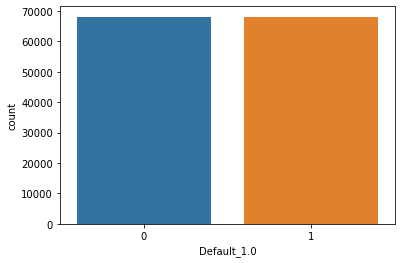

In [50]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
xtrain_sm,ytrain_sm = sm.fit_resample(x_train,y_train)
sns.countplot(ytrain_sm)

# Model1

In [991]:
# Trying a gradient boosting classifier
gradboost = GradientBoostingClassifier(n_estimators = 100, 
                                 max_depth = 6, 
                                 max_features = None)
gradboost.fit(x, y)

gradboost_SMOTE = GradientBoostingClassifier(n_estimators = 100, 
                                             max_depth = 6, 
                                             max_features = None)

gradboost_SMOTE.fit(xtrain_sm, ytrain_sm)

GradientBoostingClassifier(max_depth=6)

In [993]:
ypred_gbc_sm = gradboost_SMOTE.predict(xtest_encoded)

In [996]:
xtest_encoded["Default"] = ypred_gbc_sm 

In [997]:
xtest_encoded[["Default"]].to_csv("grad_full_smoted_tuned.csv")

In [1005]:
xtest_encoded.drop(["Default"],axis =1,inplace = True)

# Model 2 XG Boost

In [111]:
xgb2 = XGBClassifier(objective= 'binary:logistic', 
              booster = "gbtree",
              eval_metric= 'auc',
              
              eta = 0.01,
              max_depth = 1, 
              subsample = 0.75, #changed from 0.6
              colsample_bytree = 0.85,
              gamma =0.6,
              max_delta_step =3,
              min_child_weight =1,
              reg_alpha = 0,
              random_state = 42,
              scale_pos_weight = 5.6,
              max_bin =425, #changed from 450
               silent = True)
xgb2.fit(xtrain_sm,ytrain_sm)
xgb_pred = xgb2.predict(xtest_encoded)


[11:16:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [ ]:
xtest_encoded["Default"] = xgb_pred
xtest_encoded[["Default"]].to_csv("XGB_full_smoted_tuned.csv")

In [ ]:
xtest_encoded.drop(["Default"],axis =1,inplace = True)

# ensemble models

In [106]:
from sklearn.metrics import f1_score,classification_report,accuracy_score

In [173]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

# create a voting classifier with hard voting
voting_classifier_hard = VotingClassifier(
    estimators = [('Ran', RandomForestClassifier(class_weight="balanced",max_depth=5,max_features=None,criterion="log_loss")),
                  ('GBC1',GradientBoostingClassifier(n_estimators = 100, 
                                             max_depth = 6, 
                                             max_features = None)),
                  ('XGB1',  XGBClassifier(objective= 'binary:logistic', 
              booster = "gbtree",
              eval_metric= 'auc',
              eta = 0.04,
              max_depth = 5, 
              subsample = 0.9500000000000001, #changed from 0.6
              colsample_bytree = 0.65,
              gamma =0.6,
              max_delta_step =3,
              min_child_weight =2.0,
              #'alpha':0.001,
              random_state = 42,
              scale_pos_weight = 6,
              max_bin =425, #changed from 450
               silent = True)),('XGB2',  XGBClassifier(objective= 'binary:logistic', 
              booster = "gbtree",
              eval_metric= 'auc',
              eta = 0.04,
              max_depth = 5, 
              subsample = 0.6, #changed from 0.6
              colsample_bytree = 0.65,
              gamma =0.6,
              max_delta_step =3,
              min_child_weight =1,
              #'alpha':0.001,
              random_state = 42,
              scale_pos_weight = 6.5,
              max_bin =425, #changed from 450
               silent = True))], 
    voting='hard')

# create a voting classifier with soft voting
voting_classifier_soft = VotingClassifier(
    estimators = [('Ran', RandomForestClassifier(class_weight="balanced",max_depth=5,max_features=None,criterion="log_loss")),
                  ('GBC',GradientBoostingClassifier(n_estimators = 100, 
                                             max_depth = 6, 
                                             max_features = None)),
                  ('XGB1',  XGBClassifier(objective= 'binary:logistic', 
              booster = "gbtree",
              eval_metric= 'auc',
              eta = 0.04,
              max_depth = 5, 
              subsample = 0.9500000000000001, #changed from 0.6
              colsample_bytree = 0.65,
              gamma =0.6,
              max_delta_step =3,
              min_child_weight =2.0,
              #'alpha':0.001,
              random_state = 42,
              scale_pos_weight = 6,
              max_bin =425, #changed from 450
               silent = True)),('XGB2',  XGBClassifier(objective= 'binary:logistic', 
              booster = "gbtree",
              eval_metric= 'auc',
              eta = 0.04,
              max_depth = 5, 
              subsample = 0.6, #changed from 0.6
              colsample_bytree = 0.65,
              gamma =0.6,
              max_delta_step =3,
              min_child_weight =1,
              #'alpha':0.001,
              random_state = 42,
              scale_pos_weight = 6.5,
              max_bin =425, #changed from 450
               silent = True))], 
    voting='soft')

# make predictions with the hard voting model
voting_classifier_hard.fit(xtrain_sm, ytrain_sm)
y_pred_vch = voting_classifier_hard.predict(x_test)

# make predictions with the soft voting model
voting_classifier_soft.fit(xtrain_sm, ytrain_sm)
y_pred_vcs = voting_classifier_soft.predict(x_test)

# evaluate both models with the f-1 score
f1_vch = f1_score(y_test, y_pred_vch)
f1_vcs = f1_score(y_test, y_pred_vcs)

# print the f-1 scores
print('F1-score of the hard voting classifier: {}'.format(np.round(f1_vch,4)))
print('F1-score of the soft voting classifier: {}'.format(np.round(f1_vcs,4)))

[14:47:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:48:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:50:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

In [175]:
print(classification_report(y_test,y_pred_vcs))

              precision    recall  f1-score   support

           0       0.74      0.59      0.66     29319
           1       0.27      0.43      0.33     10413

    accuracy                           0.55     39732
   macro avg       0.51      0.51      0.49     39732
weighted avg       0.62      0.55      0.57     39732



In [182]:
vch = voting_classifier_hard.predict(xtest_encoded)
vcs = voting_classifier_hard.predict(xtest_encoded)

In [185]:
xtest_encoded["Default"] = vch
xtest_encoded[["Default"]].to_csv("XGBday4(Ran,GBC,XGB1,CGN2)fulldata-vch.csv")

In [184]:
xtest_encoded.drop(["Default"],axis =1,inplace = True)

## Descriptive Section

In [ ]:
# I achieved my highest score in XGBoost model. However The model was highly predicting only the minority class . which makes it a 
# bad model , in the voting classifier evev though I was not able to get the highest score. we can see that it was able to 
#predict a good and satisfying model for both the classes

In [ ]:
# Since voting classifier has the balanced score in all form we can say it is the best best model we have achieved

### Q) Once you have a mechanism to estimate the “level of default”, please describe how the financial institution must use that mechanism to decide whether to approve or decline the prospect for the loan they are applying for. 
##### (This is an open-ended question and you are free to come up with a detailed explanation basis the analysis, model building exercise you have carried out)

In [ ]:
#Financial institutions incur significant losses due to the default of loans. which has led to the tightening up of 
# loan underwriting and increased loan rejection rates. The need for a better credit risk scoring model is 
#also raised by these institutions. This warrants a study to estimate the determinants of loan default. 

In [ ]:
# As I mentioned earlier here we need a good recall as well as a good precision hence a f1 score which is the harmonic mean of them 
#would make sense. So here we need a balance of both. 

In [111]:
#High precision but low recall, In this situation our predict will be having less false positives and more false negatives. 
#which means that we will be predicting more non defaults predictions correctly. However it will lead to poor prediction 
#of defaults and we will incur huge losses by lending to those who may default.
#Low recall and high precision. In this case we will get less false negatives and more false positives hence we will 
# detect more defaulters correctly but we will also predict non defaulters as defaulters and we will reject loans we 
# Where rejection of loans to a good candidate will make us to lose business.
#Hence it would be ideal to have a balance on both of them, Since our Voting regressor model has the best balance between both
#we can choose voting regressor model as the best among these models.